In [1]:
# 1) Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from citipy import citipy

In [2]:
# 2) Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# 3) Use ZIP to pair both variables into a tuple of arrays.
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# 4) Add the latitudes and longitudes to a list.
### NOTE: You can only unzip a zipped tuple once before it is removed from the computer's memory. 
coordinates = list(lat_lngs)

In [4]:
# 5) Create a list for holding the cities.
cities = []

# 6) Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

613

In [5]:
### REQUEST LIBRARY - for requesting data from APIs ###
import requests
requests.__version__


'2.25.1'

In [10]:
### GET WEATHER DATA FROM 500 CITIES ###

# 0) Import dependencies and OpenWeather key
import requests
from config import weather_api_key
from datetime import datetime

# 1) Basic URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# 1) Set an empty list to hold cities data.
city_data = []
print("Beginning Data Retrieval     ")
print("-----------------------------")

# 2) Create a RECORD and SET counter to retrieve data in groups of 50.
record_count = 1
set_count = 1

# 3) Initial loop through all the cities in our list. (POR ALGUNA RAZÓN ESTO NO SIRVE)
#for i in range(len(cities)):

    # 3.1) Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50): # This will change set_count each 50 records.
    #    set_count += 1
    #    record_count = 1
    
    # 3.2) Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]

# 3) Initial loop through all the cities in our list.
for i, city in enumerate(cities):

    # 3.1) Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50): # This will change set_count each 50 records.
        set_count += 1
        record_count = 1
    
    # 3.2) Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # 3.3) Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # 3.4) Add 1 to the record count.
    record_count += 1
    
    # 3.5) Run an API request for each of the cities.
    try:
        # 3.5.1) Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # 3.5.2) Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # 3.5.3) Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # 3.5.4) Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # 3.6) If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# 3.7) Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | candolim
Processing Record 4 of Set 1 | humboldt
Processing Record 5 of Set 1 | ayan
Processing Record 6 of Set 1 | balakliya
Processing Record 7 of Set 1 | terrassa
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | karratha
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | tak
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | tres arroyos
Processing Record 19 of Set 1 | sidi ali
Processing Record 20 of Set 1 | guerrero negro
Processing Record 21 of Set 1 | marsa matruh
Processing Record 22 of Set 1 | torbay
Processing Reco

Processing Record 37 of Set 4 | itaituba
Processing Record 38 of Set 4 | ucluelet
Processing Record 39 of Set 4 | kavieng
Processing Record 40 of Set 4 | luanda
Processing Record 41 of Set 4 | lovozero
Processing Record 42 of Set 4 | atuona
Processing Record 43 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 4 | saint-philippe
Processing Record 45 of Set 4 | chhindwara
Processing Record 46 of Set 4 | falealupo
City not found. Skipping...
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | karaul
City not found. Skipping...
Processing Record 49 of Set 4 | valparaiso
Processing Record 50 of Set 4 | ascension
Processing Record 1 of Set 5 | king city
Processing Record 2 of Set 5 | ancud
Processing Record 3 of Set 5 | maghama
City not found. Skipping...
Processing Record 4 of Set 5 | geraldton
Processing Record 5 of Set 5 | khatanga
Processing Record 6 of Set 5 | bac lieu
Processing Record 7 of Set 5 | chokurdakh
Processing Record 8 of Set 

Processing Record 26 of Set 8 | kidal
Processing Record 27 of Set 8 | poum
Processing Record 28 of Set 8 | tual
Processing Record 29 of Set 8 | goundam
Processing Record 30 of Set 8 | thinadhoo
Processing Record 31 of Set 8 | pangnirtung
Processing Record 32 of Set 8 | khani
Processing Record 33 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 34 of Set 8 | sanming
Processing Record 35 of Set 8 | zwedru
Processing Record 36 of Set 8 | mana
Processing Record 37 of Set 8 | lola
Processing Record 38 of Set 8 | tevaitoa
Processing Record 39 of Set 8 | lazaro cardenas
Processing Record 40 of Set 8 | khor
Processing Record 41 of Set 8 | sompeta
Processing Record 42 of Set 8 | katsiveli
City not found. Skipping...
Processing Record 43 of Set 8 | huarmey
Processing Record 44 of Set 8 | fallon
Processing Record 45 of Set 8 | tessalit
Processing Record 46 of Set 8 | madison
Processing Record 47 of Set 8 | salalah
Processing Record 48 of Set 8 | chekhov
Processing Record 49 

Processing Record 13 of Set 12 | blagoyevo
Processing Record 14 of Set 12 | riyadh
Processing Record 15 of Set 12 | sur
Processing Record 16 of Set 12 | jiuquan
Processing Record 17 of Set 12 | grand centre
City not found. Skipping...
Processing Record 18 of Set 12 | pasighat
Processing Record 19 of Set 12 | asau
Processing Record 20 of Set 12 | lalmohan
Processing Record 21 of Set 12 | minab
Processing Record 22 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 23 of Set 12 | calabozo
Processing Record 24 of Set 12 | colonia
Processing Record 25 of Set 12 | isla mujeres
Processing Record 26 of Set 12 | harper
Processing Record 27 of Set 12 | mendi
Processing Record 28 of Set 12 | umea
Processing Record 29 of Set 12 | hirtshals
Processing Record 30 of Set 12 | zhangye
Processing Record 31 of Set 12 | ivanovka
Processing Record 32 of Set 12 | katherine
Processing Record 33 of Set 12 | rio grande
Processing Record 34 of Set 12 | nizhneyansk
City not found. Skipping...


In [11]:
# 4) Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,61.90,89,3,12.37,ZA,2021-10-20 00:00:01
1,Rikitea,-23.1203,-134.9692,75.16,77,2,20.27,PF,2021-10-20 00:00:02
2,Candolim,15.5181,73.7626,78.80,89,40,6.91,IN,2021-10-20 00:00:03
3,Humboldt,40.6665,-123.9178,54.86,50,100,11.23,US,2021-10-20 00:00:05
4,Ayan,56.4500,138.1667,30.81,53,14,7.16,RU,2021-10-20 00:00:06
5,Balakliya,49.4627,36.8595,32.83,77,18,7.81,UA,2021-10-20 00:00:11
6,Terrassa,41.5667,2.0167,66.85,91,0,1.99,ES,2021-10-19 23:56:03
7,Touros,-5.1989,-35.4608,78.75,79,42,13.56,BR,2021-10-20 00:00:11
8,Vaini,-21.2000,-175.2000,75.20,65,71,17.58,TO,2021-10-20 00:00:13
9,Mataura,-46.1927,168.8643,55.08,45,67,3.80,NZ,2021-10-20 00:00:15


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-10-20 00:00:01,-34.4187,19.2345,61.90,89,3,12.37
1,Rikitea,PF,2021-10-20 00:00:02,-23.1203,-134.9692,75.16,77,2,20.27
2,Candolim,IN,2021-10-20 00:00:03,15.5181,73.7626,78.80,89,40,6.91
3,Humboldt,US,2021-10-20 00:00:05,40.6665,-123.9178,54.86,50,100,11.23
4,Ayan,RU,2021-10-20 00:00:06,56.4500,138.1667,30.81,53,14,7.16


In [13]:
### EXPORT A FILE ###

# 1) Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# 2) Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

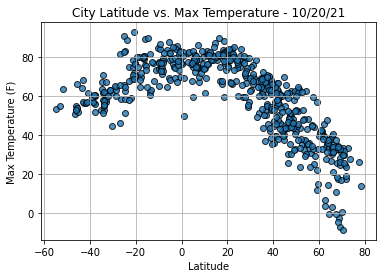

In [18]:
### Plotting the data ###

# 1) Create the needed series for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# 2) Getting today's date/time.

import time #import time dep.
# Get today's date in seconds.
today = time.strftime('%x')

# 3) Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# 3.1) Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature - "+ today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()



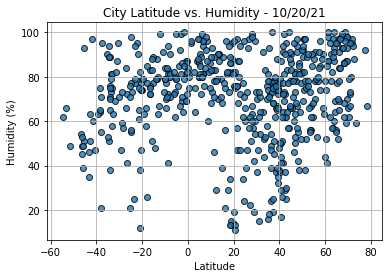

In [21]:
# 3) Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# 3.1) Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity - "+ today)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


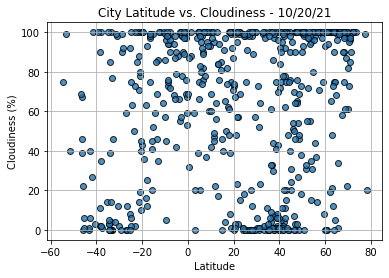

In [22]:
# 3) Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# 3.1) Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness - "+ today)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

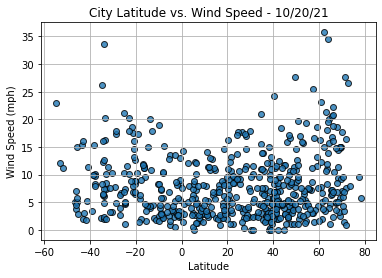

In [23]:
# 3) Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# 3.1) Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed - "+ today)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [25]:
### GETTING TWO DATAFRAMES FOR NORTHERN AND SOUTHERN HEMISPHERES.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Candolim,IN,2021-10-20 00:00:03,15.5181,73.7626,78.80,89,40,6.91
3,Humboldt,US,2021-10-20 00:00:05,40.6665,-123.9178,54.86,50,100,11.23
4,Ayan,RU,2021-10-20 00:00:06,56.4500,138.1667,30.81,53,14,7.16
5,Balakliya,UA,2021-10-20 00:00:11,49.4627,36.8595,32.83,77,18,7.81
6,Terrassa,ES,2021-10-19 23:56:03,41.5667,2.0167,66.85,91,0,1.99


### **CREATING A LINEAR REGRESSION FUNCTION**

In [33]:
# 1) Import linregress
from scipy.stats import linregress

# 2) Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # 2.1) Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # 2.2) Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # 2.3) Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # 2.4) Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values, c="lightsteelblue", edgecolor="black", linewidths=1, marker="o",alpha=0.8)
    plt.plot(x_values,regress_values,"blue")
    
    # 2.5) Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="blue")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

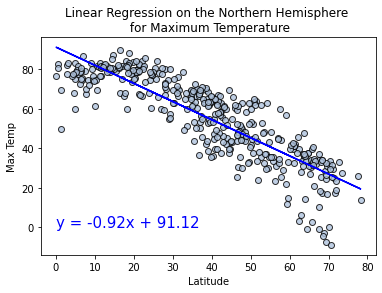

In [57]:
### Running our Linear regression function on the Northern Hemisphere - Max Temp.
# 1) Define the parameters
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# 2) Call the function: REMINDER --> plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,0))

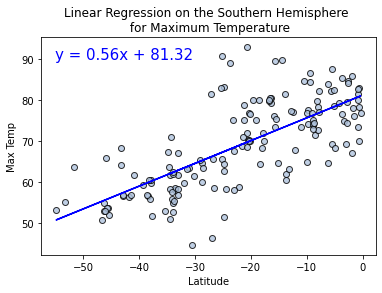

In [58]:
### Running our Linear regression function on the Northern Hemisphere - Max Temp.
# 1) Define the parameters
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# 2) Call the function: REMINDER --> plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,90))

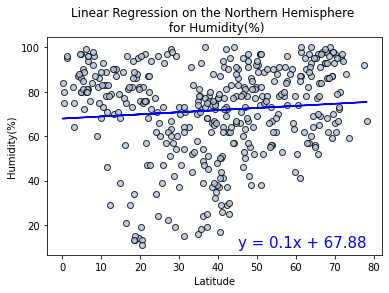

In [59]:
### Humidity
# 1) Define the parameters
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# 2) Call the function: REMINDER --> plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Humidity(%)','Humidity(%)',(45,10))

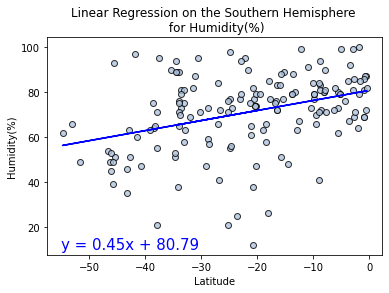

In [60]:
### Humidity
# 1) Define the parameters
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# 2) Call the function: REMINDER --> plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Humidity(%)','Humidity(%)',(-55,10))

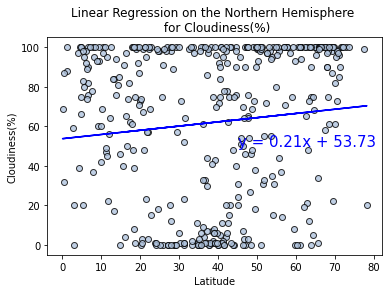

In [61]:
### Cloudiness
# 1) Define the parameters
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# 2) Call the function: REMINDER --> plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness(%)','Cloudiness(%)',(45,50))

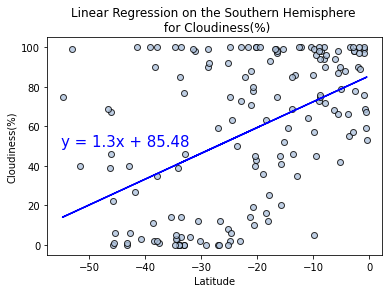

In [56]:
### Cloudiness
# 1) Define the parameters
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# 2) Call the function: REMINDER --> plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Cloudiness(%)','Cloudiness(%)',(-55,50))

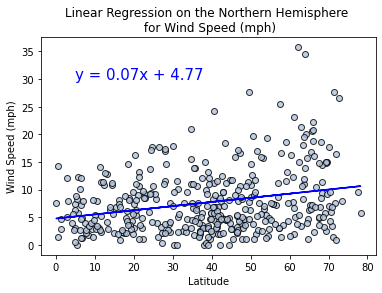

In [65]:
### Wind Speed
# 1) Define the parameters
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# 2) Call the function: REMINDER --> plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed (mph)','Wind Speed (mph)',(5,30))

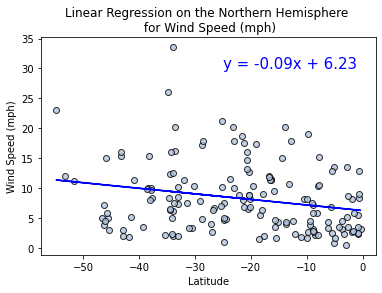

In [67]:
### Wind Speed
# 1) Define the parameters
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# 2) Call the function: REMINDER --> plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed (mph)','Wind Speed (mph)',(-25,30))